In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-housing-dataset/HousingData.csv


In [10]:
import seaborn as sns 
import  matplotlib.pyplot as plt 
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [11]:
df= pd.read_csv('/kaggle/input/boston-housing-dataset/HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [12]:
df_binary = df[['DIS', 'AGE']]
df_binary.columns = [ 'dis','age']
df_binary.head()


,dis,age
0,4.0900,65.2
1,4.9671,78.9
2,4.9671,61.1
3,6.0622,45.8
4,6.0622,54.2


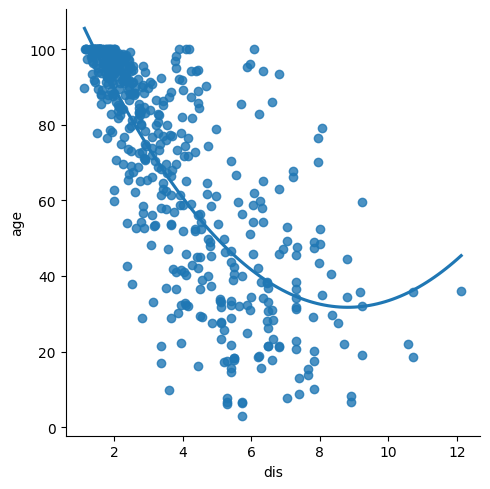

In [13]:
sns.lmplot(x="dis", y="age", data=df_binary, order = 2, ci = None )

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df_binary_copy = df_binary.copy()


df_binary_copy.fillna(method='ffill', inplace=True)

X = np.array(df_binary_copy['dis']).reshape(-1, 1)
Y = np.array(df_binary_copy['age']).reshape(-1, 1)

# Splitting data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.30)

# Creating and training the linear regression model
regr = LinearRegression()
regr.fit(X_train, Y_train)

# Calculating and printing the R-squared score on the test set
print(regr.score(X_test, Y_test))


0.5686325950310884


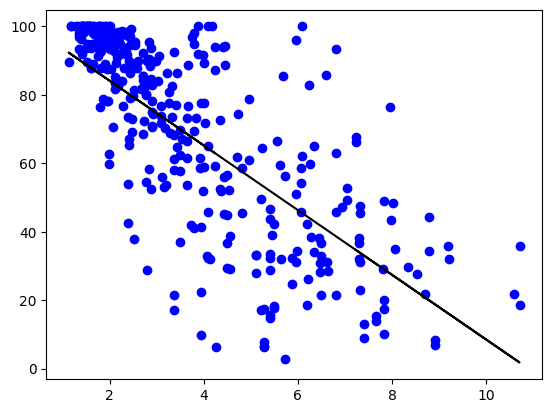

In [15]:
y_pred = regr.predict(X_test)
plt.scatter(X_test,Y_test,color='b')
plt.plot(X_test,y_pred, color='k')
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=Y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=Y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=Y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 14.457593981493524
MSE: 338.9753982975202
RMSE: 18.41128453686815
